<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/9.%20%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%20%E2%84%9612.%20%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 0. Найдите в глобальной сети или соберите свой датасет для классификации текстов (Пример: новости -> рубрики, комментарии в соц. сетях -> характер, )

* Количество классов в датасете должно превышать 2
* Язык текста в датасете: русский

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

## Загрузите датасет

In [5]:
df=pd.read_csv("..\data\comments.csv")
df = df.drop(columns=['oid'])
df.head()

,category,text
0,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


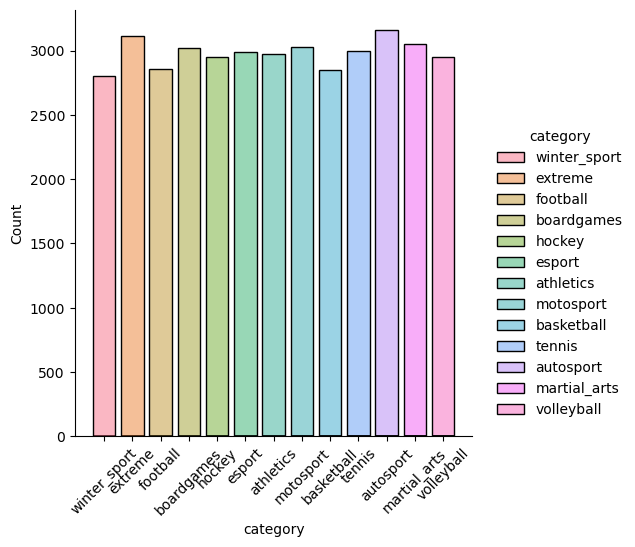

In [25]:
chart = sns.displot(df, x="category", shrink=.8, hue="category")
chart.set_xticklabels(rotation=45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38740 entries, 0 to 38739
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  38740 non-null  object
 1   text      38740 non-null  object
dtypes: object(2)
memory usage: 605.4+ KB


In [7]:
X=df['text']
y=df['category']

## Разделите данные на обучающую и валидационную выборки

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## При выполении дальнейших заданий поэксперементируйте с методами векторизации текста:


1. [Bag of Words](https://habr.com/ru/companies/mlclass/articles/270591/) (BOW): Bag of Words представляет текст как вектор, где каждый элемент обозначает количество вхождений конкретного слова в тексте. Процесс включает в себя создание словаря всех уникальных слов в корпусе текстов и подсчет частоты встречаемости каждого слова в отдельных текстах.

2. [TF-IDF](https://habr.com/ru/companies/otus/articles/755772/) (Term Frequency-Inverse Document Frequency): TF-IDF учитывает не только количество вхождений слова в текст, но и частоту его встречаемости в других текстах. Он вычисляет вес слова, умножая его частоту встречаемости (term frequency) на обратную частоту документа (inverse document frequency). Это позволяет снизить вес наиболее часто встречающихся слов, которые могут быть менее информативными.

3. Word Embeddings (например, [Word2Vec](https://habr.com/ru/articles/446530/) и [GloVe](https://jonathan-hui.medium.com/nlp-word-embedding-glove-5e7f523999f6)): Word Embeddings используют нейронные сети для создания векторных представлений слов, которые учитывают семантическую близость между словами. Нейронные сети обучаются на больших текстовых корпусах и захватывают семантические отношения между словами, что позволяет представить слова в векторном пространстве.

4. One-Hot Encoding: One-Hot Encoding преобразует каждое слово в уникальный вектор, где все элементы равны нулю, за исключением одного, который равен единице. Каждый вектор соответствует отдельному слову и используется для представления его в пространстве признаков.

5. [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): Count Vectorizer подсчитывает количество раз, которое каждое слово встречается в тексте. Он создает вектор, в котором каждый элемент соответствует количеству вхождений конкретного слова в текст.

6. [Hashing Vectorizer](https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/): Hashing Vectorizer преобразует каждое слово в уникальный числовой идентификатор с помощью хеширования. Он использует хеш-функцию для преобразования слова в числовое значение, которое затем используется в векторном представлении.

7. [Doc2Vec](https://habr.com/ru/articles/599513/): Doc2Vec является расширением метода Word2Vec и позволяет получить векторное представление не только отдельных слов, но и целых документов или текстов. Алгоритм обучает нейронную сеть, которая учитывает контекст и порядок слов в предложении, чтобы получить векторное представление документа. Это позволяет сравнивать и измерять семантическую близость между целыми текстовыми документами.

# Задание 1. Обучите модель классификатора Naive Bayes для решения поставленной задачи

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

In [11]:
clf_NaiveBaised = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

In [12]:
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [13]:
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [14]:
conf_mat_NB=confusion_matrix(y_test, y_pred_NB)

## Вывод матрицы ошибок:

<AxesSubplot:>

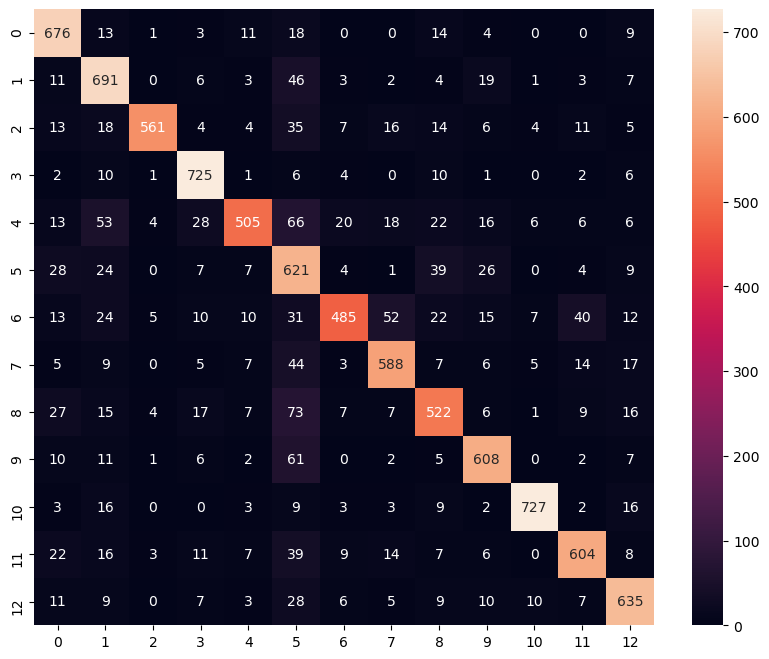

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_NB,annot=True,fmt='d')

## Оценка точности:

In [17]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

   athletics       0.81      0.90      0.85       749
   autosport       0.76      0.87      0.81       796
  basketball       0.97      0.80      0.88       698
  boardgames       0.87      0.94      0.91       768
      esport       0.89      0.66      0.76       763
     extreme       0.58      0.81      0.67       770
    football       0.88      0.67      0.76       726
      hockey       0.83      0.83      0.83       710
martial_arts       0.76      0.73      0.75       711
   motosport       0.84      0.85      0.84       715
      tennis       0.96      0.92      0.94       793
  volleyball       0.86      0.81      0.83       746
winter_sport       0.84      0.86      0.85       740

    accuracy                           0.82      9685
   macro avg       0.83      0.82      0.82      9685
weighted avg       0.83      0.82      0.82      9685



# Задание 2. Обучите модель SVM (метод опорных векторов) для решения поставленной задачи

In [26]:
clf_svm = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf", C=1000, gamma=0.001))
])

In [27]:
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [28]:
y_pred_SVM = clf_svm.predict(X_test)

## Вывод матрицы ошибок:

In [29]:
conf_mat_SVM = confusion_matrix(y_test, y_pred_SVM)

<AxesSubplot:>

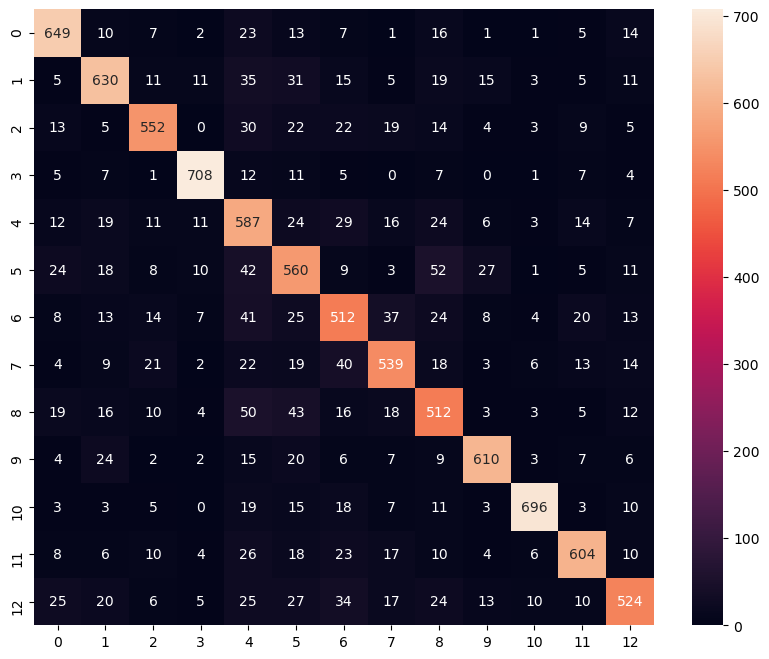

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_SVM, annot=True, fmt='d')

## Оценка точности:

In [31]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

   athletics       0.83      0.87      0.85       749
   autosport       0.81      0.79      0.80       796
  basketball       0.84      0.79      0.81       698
  boardgames       0.92      0.92      0.92       768
      esport       0.63      0.77      0.69       763
     extreme       0.68      0.73      0.70       770
    football       0.70      0.71      0.70       726
      hockey       0.79      0.76      0.77       710
martial_arts       0.69      0.72      0.71       711
   motosport       0.88      0.85      0.86       715
      tennis       0.94      0.88      0.91       793
  volleyball       0.85      0.81      0.83       746
winter_sport       0.82      0.71      0.76       740

    accuracy                           0.79      9685
   macro avg       0.80      0.79      0.79      9685
weighted avg       0.80      0.79      0.79      9685



# Задание 3. Обучите модель классификатора Decision Tree Classifier для решения поставленной задачи

In [32]:
clf_DecisionTree = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [33]:
clf_DecisionTree.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [34]:
y_pred_DT = clf_DecisionTree.predict(X_test)

## Вывод матрицы ошибок:

In [35]:
conf_mat_DT=confusion_matrix(y_test, y_pred_DT)

<AxesSubplot:>

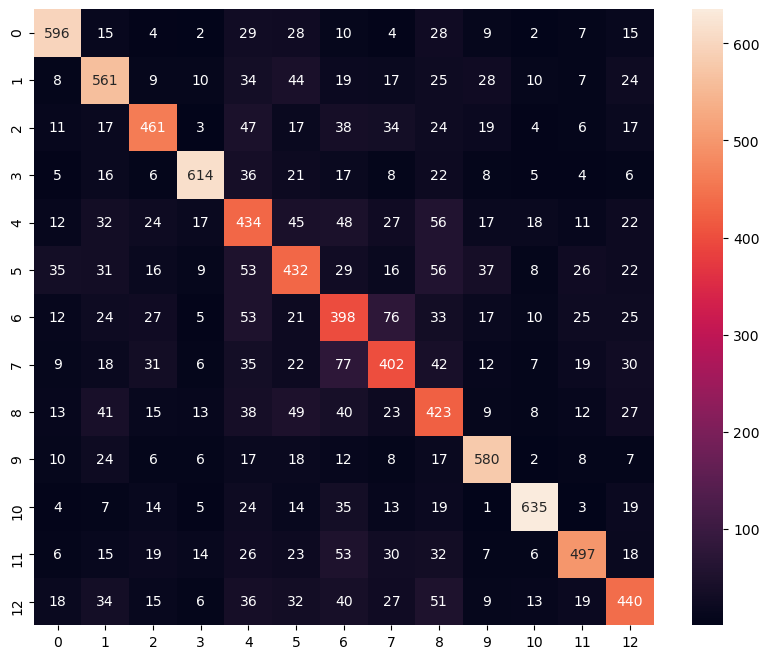

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_DT,annot=True,fmt='d')

## Оценка точности:

In [37]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

   athletics       0.81      0.80      0.80       749
   autosport       0.67      0.70      0.69       796
  basketball       0.71      0.66      0.69       698
  boardgames       0.86      0.80      0.83       768
      esport       0.50      0.57      0.53       763
     extreme       0.56      0.56      0.56       770
    football       0.49      0.55      0.52       726
      hockey       0.59      0.57      0.58       710
martial_arts       0.51      0.59      0.55       711
   motosport       0.77      0.81      0.79       715
      tennis       0.87      0.80      0.83       793
  volleyball       0.77      0.67      0.72       746
winter_sport       0.65      0.59      0.62       740

    accuracy                           0.67      9685
   macro avg       0.68      0.67      0.67      9685
weighted avg       0.68      0.67      0.67      9685



# Задание 4. Обучите модель классификатора Random Forest Classifier для решения поставленной задачи

In [38]:
clf_rf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

In [39]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier())])

In [40]:
y_pred_RF = clf_rf.predict(X_test)

## Вывод матрицы ошибок:

In [41]:
conf_mat_RF=confusion_matrix(y_test, y_pred_RF)

<AxesSubplot:>

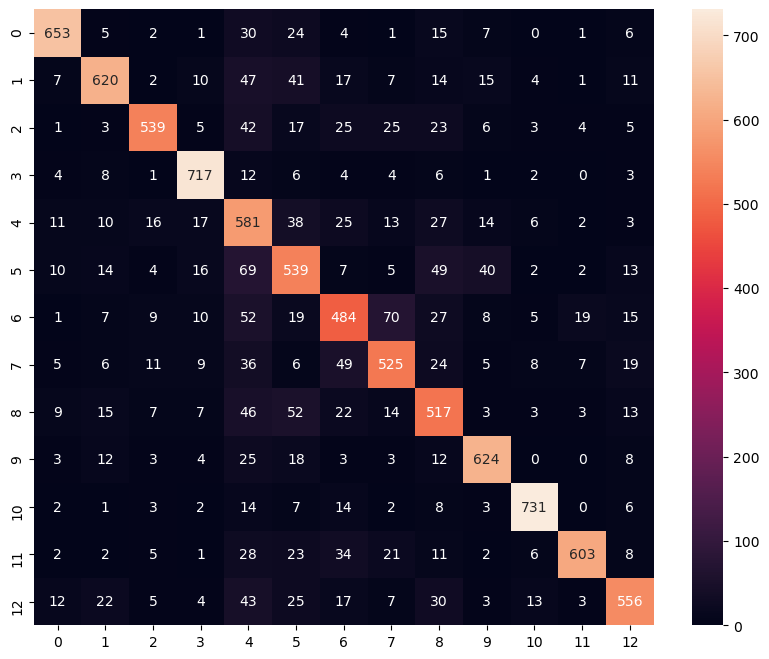

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_RF,annot=True,fmt='d')

## Оценка точности:

In [43]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

   athletics       0.91      0.87      0.89       749
   autosport       0.86      0.78      0.82       796
  basketball       0.89      0.77      0.83       698
  boardgames       0.89      0.93      0.91       768
      esport       0.57      0.76      0.65       763
     extreme       0.66      0.70      0.68       770
    football       0.69      0.67      0.68       726
      hockey       0.75      0.74      0.75       710
martial_arts       0.68      0.73      0.70       711
   motosport       0.85      0.87      0.86       715
      tennis       0.93      0.92      0.93       793
  volleyball       0.93      0.81      0.87       746
winter_sport       0.83      0.75      0.79       740

    accuracy                           0.79      9685
   macro avg       0.80      0.79      0.80      9685
weighted avg       0.80      0.79      0.80      9685



# Задание 5. Обучите модели машинного обучения для решения задачи классификации текстов, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравните их точность и быстродействие.

In [68]:
from time import time
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [70]:
accuracy = {}
training_time = {}
prediction_time = {}

## 5.1. CatBoost

In [77]:
catboost_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('catboost', CatBoostClassifier(random_state=33))
])

In [78]:
start_time = time()
catboost_model.fit(X_train, y_train_enc)
training_time['CatBoost'] = time() - start_time

Learning rate set to 0.093961
0:	learn: 2.4610423	total: 969ms	remaining: 16m 8s
1:	learn: 2.4112423	total: 1.8s	remaining: 14m 58s
2:	learn: 2.3697235	total: 2.57s	remaining: 14m 15s
3:	learn: 2.3336621	total: 3.36s	remaining: 13m 55s
4:	learn: 2.3059187	total: 4.14s	remaining: 13m 45s
5:	learn: 2.2796471	total: 4.95s	remaining: 13m 40s
6:	learn: 2.2566351	total: 5.78s	remaining: 13m 39s
7:	learn: 2.2397944	total: 6.57s	remaining: 13m 35s
8:	learn: 2.2225156	total: 7.36s	remaining: 13m 30s
9:	learn: 2.2057447	total: 8.14s	remaining: 13m 25s
10:	learn: 2.1897239	total: 8.91s	remaining: 13m 20s
11:	learn: 2.1757147	total: 9.68s	remaining: 13m 16s
12:	learn: 2.1617537	total: 10.4s	remaining: 13m 13s
13:	learn: 2.1460353	total: 11.2s	remaining: 13m 12s
14:	learn: 2.1347315	total: 12s	remaining: 13m 10s
15:	learn: 2.1210802	total: 12.8s	remaining: 13m 8s
16:	learn: 2.1103258	total: 13.6s	remaining: 13m 6s
17:	learn: 2.0995263	total: 14.4s	remaining: 13m 4s
18:	learn: 2.0881985	total: 15.2s

In [79]:
start_time = time()
y_pred_Cat = catboost_model.predict(X_test)
prediction_time['CatBoost'] = time() - start_time

<AxesSubplot:>

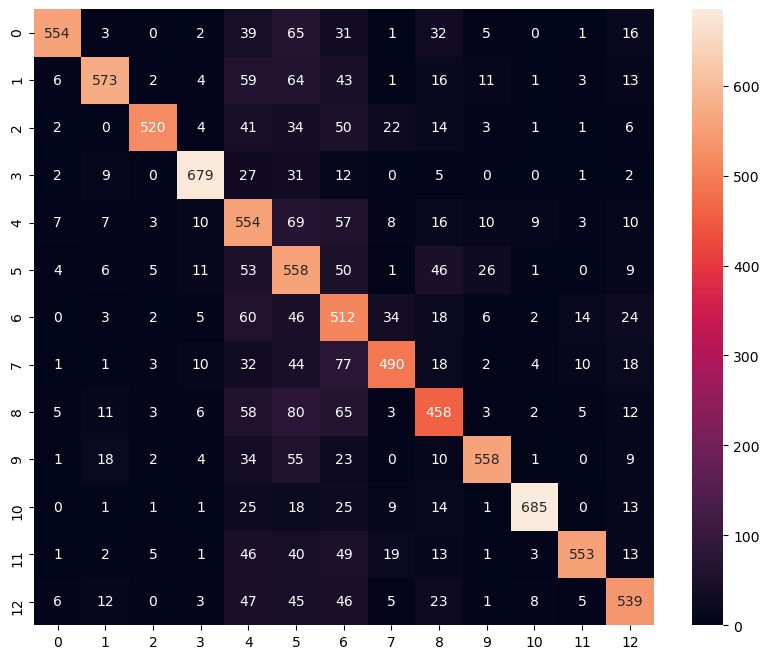

In [80]:
conf_mat_Cat = confusion_matrix(y_test_enc, y_pred_Cat)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_Cat, annot=True, fmt='d')

In [81]:
acc = accuracy_score(y_test_enc, y_pred_Cat)
accuracy['CatBoost'] = acc
acc

0.7468249870934435

## 5.2. Light GBM

In [84]:
lgbm_model = Pipeline([
    ('vectorizer', CountVectorizer(dtype=np.float32)),
    ('lgbm', LGBMClassifier(random_state=33))
])

In [85]:
start_time = time()
lgbm_model.fit(X_train, y_train_enc)
training_time['LGBM'] = time() - start_time

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30401
[LightGBM] [Info] Number of data points in the train set: 29055, number of used features: 9100
[LightGBM] [Info] Start training from score -2.571233
[LightGBM] [Info] Start training from score -2.508835
[LightGBM] [Info] Start training from score -2.602793
[LightGBM] [Info] Start training from score -2.557372
[LightGBM] [Info] Start training from score -2.568535
[LightGBM] [Info] Start training from score -2.519040
[LightGBM] [Info] Start training from score -2.611192
[LightGBM] [Info] Start training from score -2.562715
[LightGBM] [Info] Start training from score -2.519467
[LightGBM] [Info] Start training from score -2.529781
[LightGBM] [Info] Start training from score -2.577556
[LightGBM] [Info] Start training from score -2.578

In [86]:
start_time = time()
y_pred_LGBM = lgbm_model.predict(X_test)
prediction_time['LGBM'] = time() - start_time

<AxesSubplot:>

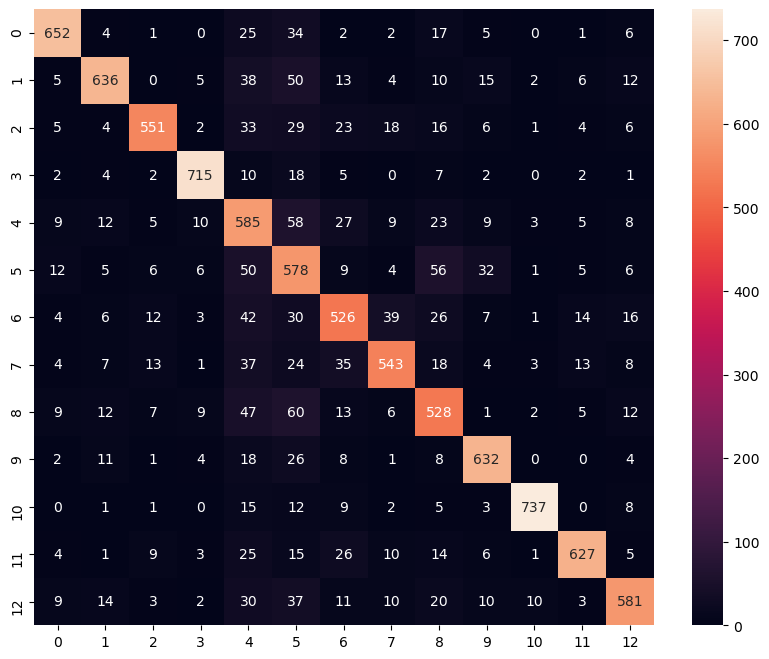

In [87]:
conf_mat_LGBM = confusion_matrix(y_test_enc, y_pred_LGBM)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_LGBM, annot=True, fmt='d')

In [88]:
acc = accuracy_score(y_test_enc, y_pred_LGBM)
accuracy['LGBM'] = acc
acc

0.8147651006711409

## 5.3. XGBoost

In [71]:
xgboost_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('xgboost', XGBClassifier(random_state=33))
])

In [72]:
start_time = time()
xgboost_model.fit(X_train, y_train_enc)
training_time['XGBoost'] = time() - start_time

In [73]:
start_time = time()
y_pred_XG = xgboost_model.predict(X_test)
prediction_time['XGBoost'] = time() - start_time

<AxesSubplot:>

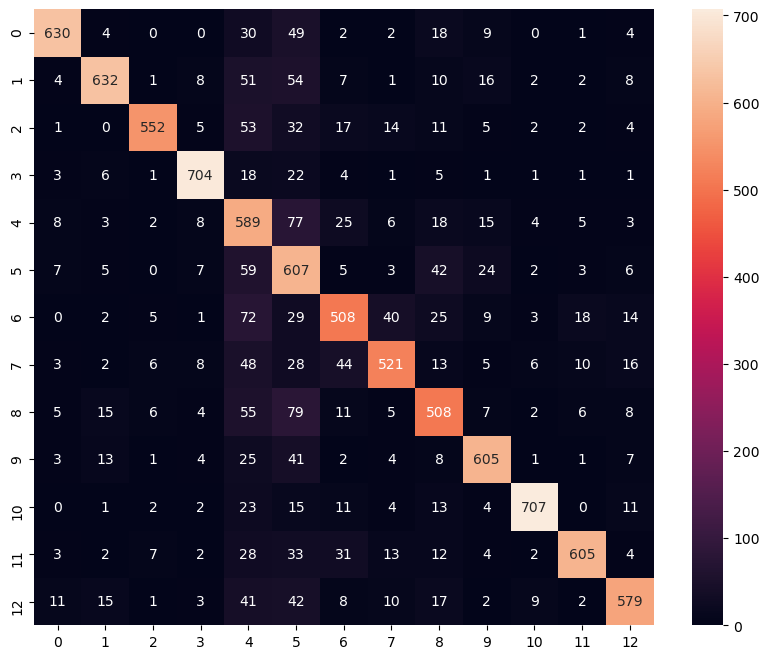

In [74]:
conf_mat_XG = confusion_matrix(y_test_enc, y_pred_XG)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_XG, annot=True, fmt='d')

In [76]:
acc = accuracy_score(y_test_enc, y_pred_XG)
accuracy['XGBoost'] = acc
acc

0.7998967475477543

## 5.3. AdaBoost

In [89]:
adaboost_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('adaboost', AdaBoostClassifier(random_state=33))
])

In [90]:
start_time = time()
adaboost_model.fit(X_train, y_train_enc)
training_time['AdaBoost'] = time() - start_time

In [91]:
start_time = time()
y_pred_Ada = adaboost_model.predict(X_test)
prediction_time['AdaBoost'] = time() - start_time

<AxesSubplot:>

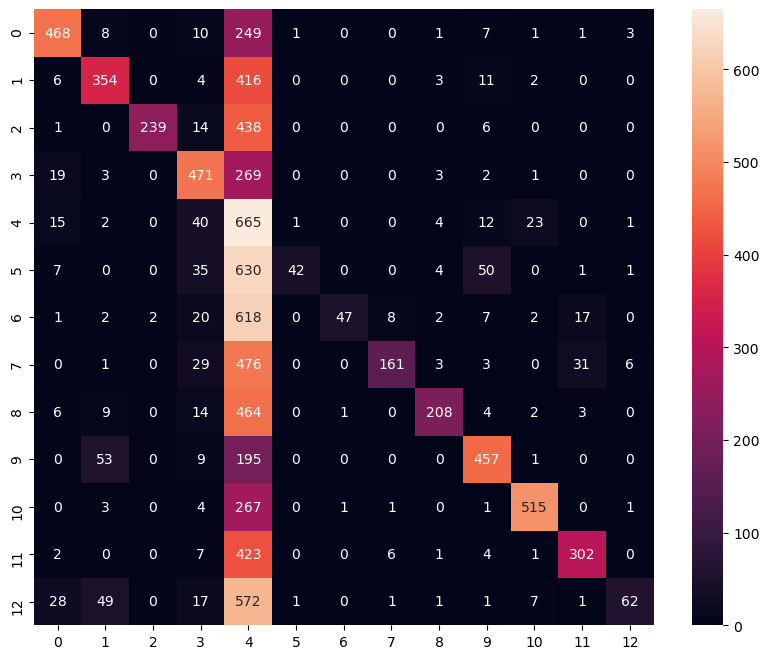

In [94]:
conf_mat_Ada = confusion_matrix(y_test_enc, y_pred_Ada)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_Ada, annot=True, fmt='d')

In [96]:
acc = accuracy_score(y_test_enc, y_pred_Ada)
accuracy['AdaBoost'] = acc
acc

0.4120805369127517

# Подведите общие итоги

In [97]:
for algo, result in accuracy.items():
    print(f"{algo:{20}}: Score: {result}, Training time: {training_time[algo]}, Prediction time: {prediction_time[algo]}")

XGBoost             : Score: 0.7998967475477543, Training time: 30.359374284744263, Prediction time: 0.5027515888214111
CatBoost            : Score: 0.7468249870934435, Training time: 848.283684015274, Prediction time: 0.7594079971313477
LGBM                : Score: 0.8147651006711409, Training time: 8.083567142486572, Prediction time: 0.5711076259613037
AdaBoost            : Score: 0.4120805369127517, Training time: 9.145576238632202, Prediction time: 0.6547513008117676
